In [244]:
"""
This Neural Network replaces an RVE(stacked layers of TiAl) in FE2 analysis.

Strategy: Homogenized stresses (Hill) from an RVE are collected for randomly generated strain paths. 

These are trained using RNNs such that sequence of strains gives sequence of stresses, effectively replacing RVE of a material routine

"""



import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [245]:
strains = np.genfromtxt('/home/vemu_sa/Desktop/inputs_fe2/Data_TiAl/strains.csv',delimiter=',')


In [246]:

#There are 14 samples of strains(6 components) each having 22 time steps placed sequentially in an array. The extra column is time, we can strip it 

strains = np.delete(strains,0,1)
strains.shape

(308, 6)

In [247]:
#14 sample, each sample 22 time steps, 6 components placed sequentially
stresses = np.genfromtxt('/home/vemu_sa/Desktop/inputs_fe2/Data_TiAl/stresses.csv',delimiter=',')

In [248]:
train_strains= strains[:13*22,:]

train_stresses=stresses[:13*22,:]

validation_strains= strains[13*22:,:]
validation_stresses=stresses[13*22:,:]

scaler_strains = MinMaxScaler(feature_range=(0,1))
scaler_stresses =MinMaxScaler(feature_range=(0,1))

strain_scaler= scaler_strains.fit(train_strains)
stress_scaler= scaler_stresses.fit(train_stresses)

train_strains_norm = strain_scaler.transform(train_strains)
train_stresses_norm =stress_scaler.transform(train_stresses)
validation_strains_norm = strain_scaler.transform(validation_strains)
validation_stresses_norm=stress_scaler.transform(validation_stresses)

In [249]:
training_strains = train_strains_norm.reshape((13,22,6))
training_stresses= train_stresses_norm.reshape((13,22,6))
validation_strains=validation_strains_norm.reshape((1,22,6))
validation_stresses=validation_stresses_norm.reshape((1,22,6))


In [250]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [251]:
model = Sequential()
model.add(LSTM(32,input_shape=(training_strains.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32,input_shape=(training_strains.shape[1:]),return_sequences=True))
model.add(Dropout(0.2))


model.add(Dense(6))


opt = tf.keras.optimizers.RMSprop()

model.compile(loss='mse',optimizer=opt,metrics=['mse'])


In [252]:
def fit_model(model):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200)
    history = model.fit(training_strains,training_stresses,epochs=2000,batch_size=13,shuffle = False,callbacks=[early_stop],
                       validation_data=(validation_strains,validation_stresses))
    return history

In [253]:
history = fit_model(model)

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 0.3478 - mse: 0.3478 - val_loss: 0.2747 - val_mse: 0.2747
Epoch 2/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.2826 - mse: 0.2826 - val_loss: 0.2307 - val_mse: 0.2307
Epoch 3/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.2359 - mse: 0.2359 - val_loss: 0.1956 - val_mse: 0.1956
Epoch 4/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.2013 - mse: 0.2013 - val_loss: 0.1659 - val_mse: 0.1659
Epoch 5/2000
1/1 [==============================] - 0s 41ms/step - loss: 0.1756 - mse: 0.1756 - val_loss: 0.1406 - val_mse: 0.1406
Epoch 6/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.1483 - mse: 0.1483 - val_loss: 0.1209 - val_mse: 0.1209
Epoch 7/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.1331 - mse: 0.1331 - val_loss: 0.1055 - val_mse: 0.1055
Epoch 8/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.1170 - mse

Epoch 125/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.0297 - mse: 0.0297 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 126/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0301 - mse: 0.0301 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 127/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0286 - mse: 0.0286 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 128/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 129/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0240 - val_mse: 0.0240
Epoch 130/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0239 - val_mse: 0.0239
Epoch 131/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0238 - val_mse: 0.0238
Epoch 132/2000
1/1 [==============================] - 0s 36ms/step - 

Epoch 248/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 249/2000
1/1 [==============================] - 0s 46ms/step - loss: 0.0175 - mse: 0.0175 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 250/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0153 - val_mse: 0.0153
Epoch 251/2000
1/1 [==============================] - 0s 50ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 252/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0149 - val_mse: 0.0149
Epoch 253/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0170 - mse: 0.0170 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 254/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 255/2000
1/1 [==============================] - 0s 35ms/step - 

Epoch 371/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 372/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 373/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 374/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 375/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 376/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 377/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 378/2000
1/1 [==============================] - 0s 33ms/step - 

Epoch 494/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0055 - val_mse: 0.0055
Epoch 495/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 496/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 497/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 498/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0054 - val_mse: 0.0054
Epoch 499/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 500/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 501/2000
1/1 [==============================] - 0s 34ms/step - 

Epoch 617/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 618/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 619/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 620/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 621/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 622/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 623/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 624/2000
1/1 [==============================] - 0s 32ms/step - 

Epoch 740/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 741/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 742/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 743/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 744/2000
1/1 [==============================] - 0s 51ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 745/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 746/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 747/2000
1/1 [==============================] - 0s 31ms/step - 

Epoch 863/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 864/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 865/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 866/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 867/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 868/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 869/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 870/2000
1/1 [==============================] - 0s 32ms/step - 

Epoch 986/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.0059 - mse: 0.0059 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 987/2000
1/1 [==============================] - 0s 33ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 988/2000
1/1 [==============================] - 0s 47ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 989/2000
1/1 [==============================] - 0s 35ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 990/2000
1/1 [==============================] - 0s 32ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 991/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 992/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 993/2000
1/1 [==============================] - 0s 48ms/step - 

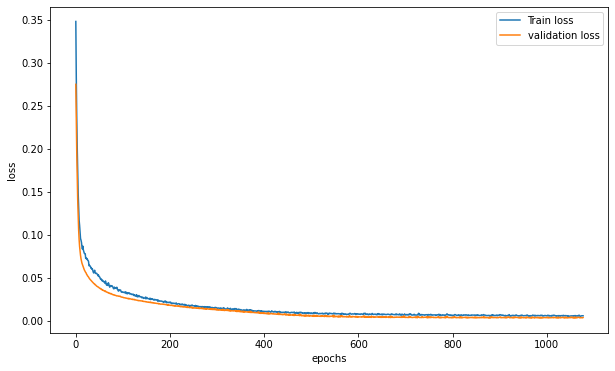

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train loss','validation loss'], loc='upper right')

In [255]:
prediction_validation = model.predict(validation_strains)

In [256]:
stress = scaler_stresses.inverse_transform(prediction_validation[0])

In [257]:
stress

array([[ 4.72361565e+01,  6.47438965e+01,  3.51186447e+01,
         8.98777199e+00,  9.34183025e+00,  7.49362612e+00],
       [ 8.50915298e+01,  1.31290436e+02,  1.51553253e+02,
         2.34895363e+01, -9.58137512e+00,  1.74302654e+01],
       [-5.86966972e+01, -3.97738571e+01, -9.27638245e+01,
         1.18744097e+01,  2.00608749e+01, -2.81407967e+01],
       [-1.60308350e+02, -3.15738586e+02, -2.92038300e+02,
         3.62552223e+01, -6.11513824e+01,  1.66064949e+01],
       [ 1.86551575e+02,  1.42693954e+02,  1.94378677e+02,
        -4.51088257e+01,  6.05640488e+01,  4.74936562e+01],
       [-3.09373901e+02,  5.14501648e+01, -1.24003098e+02,
         4.27342072e+01,  5.66209641e+01,  3.57134552e+01],
       [ 3.62078094e+01,  3.53141235e+02,  2.41739349e+02,
         2.01400509e+01, -6.27507439e+01, -1.92677441e+01],
       [ 4.89059525e+01, -5.06042267e+02, -5.24446716e+02,
         9.78757095e+01,  9.70880127e+01,  1.10937897e+02],
       [ 8.13905823e+02,  6.59079773e+02,  9.237